Частина 2


В цій частині ми знову будемо працювати з датасетом fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

from keras.utils import img_to_array, array_to_img

In [18]:
from keras.datasets import fashion_mnist

In [19]:
num_classes = 10 # общее количество классов, в нашем случае это цифры от 0 до 9
batch_size = 500 # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов

In [20]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_labels=tf.one_hot(train_labels, depth=num_classes)
test_labels=tf.one_hot(test_labels, depth=num_classes)

In [21]:
train_images = train_data.reshape([-1, 784])
train_images=np.dstack([train_images]*3)
train_images.shape
train_images = train_images.reshape(-1, 28,28,3) #(60000, 28, 28, 3)
train_images=np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_images])
train_images = train_images.astype("float32") / 255.

In [22]:
test_images = test_data.reshape([-1, 784])
test_images=np.dstack([test_images] * 3)
test_images = test_images.reshape(-1, 28,28,3) #(10000, 28, 28, 3)
test_images=np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_images])
test_images = test_images.astype("float32") / 255.

In [23]:
train_images.shape, test_images.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [24]:
train_images=preprocess_input(train_images)
test_images=preprocess_input(test_images)

In [25]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(48, 48, 3) )

In [26]:
conv_base.trainable=True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [27]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [28]:
model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="sigmoid"),
   Dense(10, activation="softmax"),
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [30]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss=losses.CategoricalCrossentropy(),
    metrics=['categorical_accuracy'],
)

In [31]:
callback_early_stopping = EarlyStopping(
    monitor="val_categorical_accuracy",
    min_delta=0.000001,
    patience=5,
)

In [32]:
history = model.fit(
    train_images,
    train_labels,
    epochs=70,
    batch_size=batch_size,
    validation_data=(test_images, test_labels),
    #callbacks=[callback_early_stopping],
    verbose=1,
)

Epoch 1/70
120/120 [==============================] - 36s 172ms/step - loss: 1.9733 - categorical_accuracy: 0.3099 - val_loss: 1.5564 - val_categorical_accuracy: 0.5362
Epoch 2/70
120/120 [==============================] - 23s 195ms/step - loss: 1.2875 - categorical_accuracy: 0.5920 - val_loss: 1.1060 - val_categorical_accuracy: 0.6407
Epoch 3/70
120/120 [==============================] - 21s 173ms/step - loss: 0.9962 - categorical_accuracy: 0.6765 - val_loss: 0.9099 - val_categorical_accuracy: 0.7120
Epoch 4/70
120/120 [==============================] - 20s 169ms/step - loss: 0.8567 - categorical_accuracy: 0.7137 - val_loss: 0.8226 - val_categorical_accuracy: 0.7087
Epoch 5/70
120/120 [==============================] - 20s 167ms/step - loss: 0.7590 - categorical_accuracy: 0.7354 - val_loss: 0.7156 - val_categorical_accuracy: 0.7483
Epoch 6/70
120/120 [==============================] - 20s 168ms/step - loss: 0.6884 - categorical_accuracy: 0.7561 - val_loss: 0.6520 - val_categorical_acc

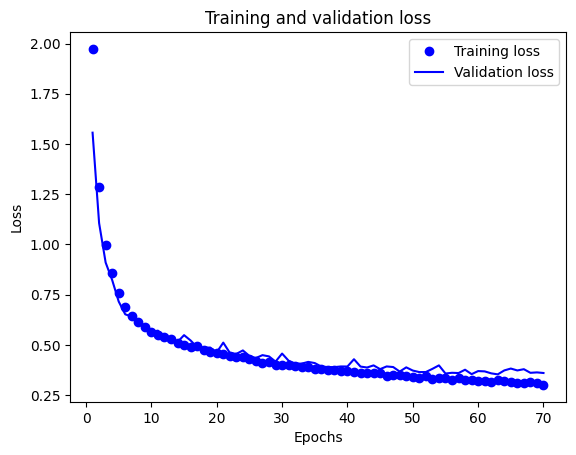

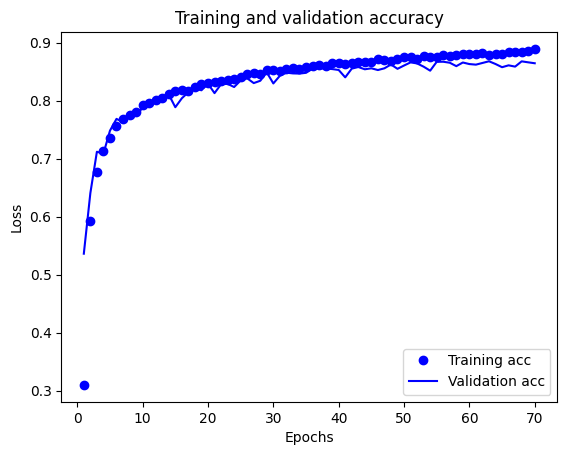

In [33]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['categorical_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_categorical_accuracy']
plt.plot(epochs, history_dict['categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_categorical_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [34]:
results = model.evaluate(test_images, test_labels)
print(results)

313/313 [==============================] - 5s 14ms/step - loss: 0.3600 - categorical_accuracy: 0.8646
[0.36001431941986084, 0.8646000027656555]


In [35]:
model.save("/content/drive/MyDrive/Data S/Hw10/model_Hw10_part2_2_")

Висновки

Була розроблена модель з використанням передвиборної мережі на базі VGG16. Отриманий результат точності дорівнює 86%